## **Semi-automatic pipeline using concept drift analysis for improving metabolomics predictions**


> Given the tremendous increase in optimized prediction methods and the availability of big data in metabolomics, it is important to focus on appropriate implementation and supplementation of techniques that fit with biological assumptions. This ensures that real-world diagnosis of early symptoms is facilitated. One of the most challenging scenarios in predictive data analysis is prediction based on data that may be influenced by a third factor that does not enter directly into the predictive analysis, the so-called confounding factor. The detection and subsequent correction of confounding factors aids in the accuracy of prediction models and so facilitate the diagnosis of early symptoms with the elimination of false negatives results that may contribute to diagnostic errors in medicine. Here we presents a new implementation of concept drift analysis based on biological knowledge, and information described real-world to improve the accuracy of prediction methods. We also determined possible confounding factors based on biological assumptions confirmed by the detected concept drift. These confounding factors were used in the correction of the prediction algorithms to improve the accuracy of the prediction models.




---






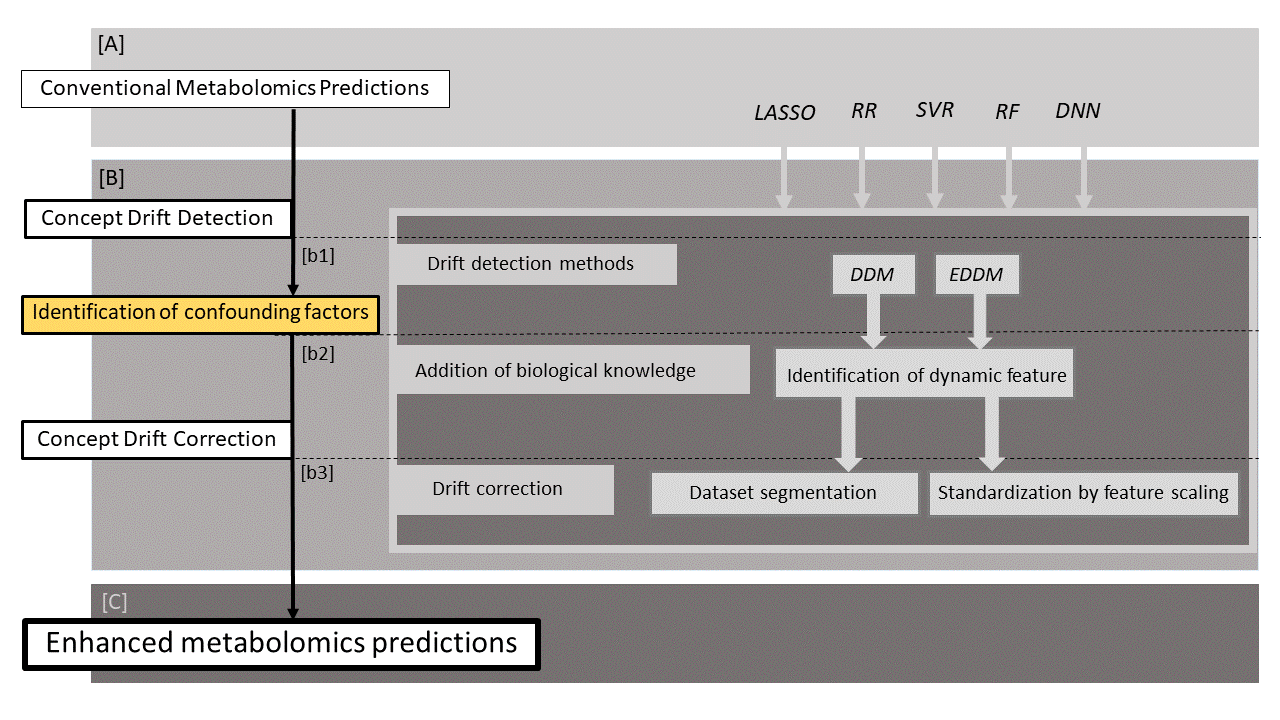

**Installation required packages and repositories**

In [ ]:
! pip install scikit-multiflow

In [ ]:
import math
import csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
#from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error

from skmultiflow.drift_detection.ddm import DDM
from skmultiflow.drift_detection.eddm import EDDM

from sklearn.pipeline import make_pipeline

from google.colab import drive
drive.mount('/content/drive')



**Loading dataset**


> Metabolite unification nomenclature was performed for GM (training and testing) and CSF (testing) data as features for predictive models across these two studies was performed by MetaboAnalyst. 

https://www.metaboanalyst.ca/MetaboAnalyst/upload/PathUploadView.xhtml


> Missing values were filled with half of the minimum value, and outliers were removed using COVAIN.

https://mosys.univie.ac.at/resources/software/


In [ ]:
#Load data

# data from study Chu et al.
url_Chu_et_al = '/content/drive/MyDrive/ms_special_issue_JS/dataset/Table3S_input.csv'

# data from study Li et al.
url_Li_et_al = '/content/drive/MyDrive/ms_special_issue_JS/dataset/Table4S_input.csv'


# **[A] Conventional metabolomics prediction**


***LASSO Classifier*** (Least Absolute Shrinkage and Selection Operator) 

In [ ]:
data_frame = pd.read_csv(url_Chu_et_al, delimiter=',')

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~data_frame.isin([np.nan, np.inf, -np.inf]).any(1)
    return data_frame[indices_to_keep].astype(np.float64)

data_frame = clean_dataset(data_frame)

# Splitting the dataset
met_X, met_y = data_frame.drop(columns="gender"), data_frame.gender
met_train_X, met_test_X, met_train_y, met_test_y = train_test_split(met_X, met_y, test_size=0.2, random_state=42)

# Training of the classificator
model_Lasso = make_pipeline(SimpleImputer(), OneHotEncoder(handle_unknown='ignore'), Lasso(max_iter=1500))
model_Lasso.fit(met_train_X, met_train_y)
predicted_Lasso = model_Lasso.predict(met_test_X)
print(model_Lasso.score(met_test_X, met_test_y))

model_Lasso = Lasso(alpha=0.1,max_iter=50000)
model_Lasso.fit(met_train_X,met_train_y)
predicted_Lasso = model_Lasso.predict(met_test_X)
print(model_Lasso.score(met_test_X, met_test_y))

#Model evaluation:
score = cross_val_score(model_Lasso,met_test_X,met_test_y,cv=10)
print(score)
print("Mean accuracy of LASSO classifier is ",score.mean(),"and its standard deviation is",score.std())

occuracy_Lasso = classification_report(met_test_y,predicted_Lasso.astype('int64'))
print(occuracy_Lasso)

In [ ]:
data_frame = pd.read_csv(url_Li_et_al, delimiter=',')

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~data_frame.isin([np.nan, np.inf, -np.inf]).any(1)
    return data_frame[indices_to_keep].astype(np.float64)

data_frame = clean_dataset(data_frame)

# Splitting the dataset
met_X, met_y = data_frame.drop(columns="gender"), data_frame.gender

# Testing of the classificator: 
predicted_Lasso = model_Lasso.predict(met_X)
print(model_Lasso.score(met_X, met_y))

# Model evaluation:
score = cross_val_score(model_Lasso,met_X,met_y,cv=10)
print(score)
print("Mean accuracy of LASSO classifier is ",score.mean(),"and its standard deviation is",score.std())

occuracy_Lasso = classification_report(met_y,predicted_Lasso.astype('int64'))

print(occuracy_Lasso)

***RR Classifier*** (Ridge Regression)

In [ ]:
data_frame = pd.read_csv(url_Chu_et_al, delimiter=',')

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~data_frame.isin([np.nan, np.inf, -np.inf]).any(1)
    return data_frame[indices_to_keep].astype(np.float64)

data_frame = clean_dataset(data_frame)

# Splitting the dataset
met_X, met_y = data_frame.drop(columns="gender"), data_frame.gender
met_train_X, met_test_X, met_train_y, met_test_y = train_test_split(met_X, met_y, test_size=0.2, random_state=42)

# Training of the classificator
model_Ridge = make_pipeline(SimpleImputer(), OneHotEncoder(handle_unknown='ignore'), Ridge(max_iter=1500))
model_Ridge.fit(met_train_X, met_train_y)
predicted_Ridge = model_Ridge.predict(met_test_X)
print(model_Ridge.score(met_test_X, met_test_y))

model_Ridge = Ridge(alpha=1.0,max_iter=50000)
model_Ridge.fit(met_train_X,met_train_y)
predicted_Ridge = model_Ridge.predict(met_test_X)
print(model_Ridge.score(met_test_X, met_test_y))

#Model evaluation:
score = cross_val_score(model_Ridge,met_test_X,met_test_y,cv=10)
print(score)
print("Mean accuracy of RR classifier is ",score.mean(),"and its standard deviation is",score.std())

occuracy_Ridge = classification_report(met_test_y,predicted_Ridge.astype('int64'))
print(occuracy_Ridge)


In [ ]:
data_frame = pd.read_csv(url_Li_et_al, delimiter=',')

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~data_frame.isin([np.nan, np.inf, -np.inf]).any(1)
    return data_frame[indices_to_keep].astype(np.float64)

data_frame = clean_dataset(data_frame)

# Splitting the dataset
met_X, met_y = data_frame.drop(columns="gender"), data_frame.gender

# Testing of the classificator: 
predicted_Ridge = model_Ridge.predict(met_X)
print(model_Ridge.score(met_X, met_y))

# Model evaluation:
score = cross_val_score(model_Ridge,met_X,met_y,cv=10)
print(score)
print("Mean accuracy of RR classifier is ",score.mean(),"and its standard deviation is",score.std())

occuracy_Ridge = classification_report(met_y,predicted_Ridge.astype('int64'))
print(occuracy_Ridge)

***SVR Classifier*** (Support Vector machine Regression)



In [ ]:
data_frame = pd.read_csv(url_Chu_et_al, delimiter=',')

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~data_frame.isin([np.nan, np.inf, -np.inf]).any(1)
    return data_frame[indices_to_keep].astype(np.float64)

data_frame = clean_dataset(data_frame)

# Splitting the dataset
met_X, met_y = data_frame.drop(columns="gender"), data_frame.gender
met_train_X, met_test_X, met_train_y, met_test_y = train_test_split(met_X, met_y, test_size=0.2, random_state=42)

# Training of the classificator
model_SVR = make_pipeline(SimpleImputer(), OneHotEncoder(handle_unknown='ignore'), SVR(max_iter=1500))
model_SVR.fit(met_train_X, met_train_y)
predicted_SVR = model_SVR.predict(met_test_X)
print(model_SVR.score(met_test_X, met_test_y))

model_SVR = SVR(max_iter=50000)
model_SVR.fit(met_train_X,met_train_y)
predicted_SVR = model_SVR.predict(met_test_X)
print(model_SVR.score(met_test_X, met_test_y))

#Model evaluation:
score = cross_val_score(model_SVR,met_test_X,met_test_y,cv=10)
print(score)
print("Mean accuracy of SVR classifier is ",score.mean(),"and its standard deviation is",score.std())

occuracy_SVR = classification_report(met_test_y,predicted_SVR.astype('int64'))
print(occuracy_SVR)

In [ ]:
data_frame = pd.read_csv(url_Li_et_al, delimiter=',')

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~data_frame.isin([np.nan, np.inf, -np.inf]).any(1)
    return data_frame[indices_to_keep].astype(np.float64)

data_frame = clean_dataset(data_frame)

# Splitting the dataset
met_X, met_y = data_frame.drop(columns="gender"), data_frame.gender

# Testing of the classificator: 
predicted_SVR = model_SVR.predict(met_X)
print(model_SVR.score(met_X, met_y))

# Model evaluation:
score = cross_val_score(model_SVR,met_X,met_y,cv=10)
print(score)
print("Mean accuracy of SVR classifier is ",score.mean(),"and its standard deviation is",score.std())

occuracy_SVR = classification_report(met_y,predicted_SVR.astype('int64'))
print(occuracy_SVR)

***RF Classifier*** (Random Forest)

In [ ]:
data_frame = pd.read_csv(url_Chu_et_al, delimiter=',')

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~data_frame.isin([np.nan, np.inf, -np.inf]).any(1)
    return data_frame[indices_to_keep].astype(np.float64)

data_frame = clean_dataset(data_frame)

# Splitting the dataset
met_X, met_y = data_frame.drop(columns="gender"), data_frame.gender
met_train_X, met_test_X, met_train_y, met_test_y = train_test_split(met_X, met_y, test_size=0.2, random_state=42)

# Training of the classificator
model_RF = make_pipeline(SimpleImputer(), OneHotEncoder(handle_unknown='ignore'), RandomForestClassifier(n_estimators=50))
model_RF.fit(met_train_X, met_train_y)
predicted_RF = model_RF.predict(met_test_X)
print(model_RF.score(met_test_X, met_test_y))

model_RF = RandomForestClassifier(n_estimators=100)
model_RF.fit(met_train_X,met_train_y)
predicted_RF = model_RF.predict(met_test_X)
print(model_RF.score(met_test_X, met_test_y))

#Model evaluation:
score = cross_val_score(model_RF,met_test_X,met_test_y,cv=10)
print(score)
print("Mean accuracy of RF classifier is ",score.mean(),"and its standard deviation is",score.std())

occuracy_RF = classification_report(met_test_y,predicted_RF.astype('int64'))
print(occuracy_RF)

In [ ]:
data_frame = pd.read_csv(url_Li_et_al, delimiter=',')

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~data_frame.isin([np.nan, np.inf, -np.inf]).any(1)
    return data_frame[indices_to_keep].astype(np.float64)

data_frame = clean_dataset(data_frame)

# Splitting the dataset
met_X, met_y = data_frame.drop(columns="gender"), data_frame.gender

# Testing of the classificator: 
predicted_RF = model_RF.predict(met_X)
print(model_RF.score(met_X, met_y))

# Model evaluation:
score = cross_val_score(model_RF,met_X,met_y,cv=10)
print(score)
print("Mean accuracy of RF classifier is ",score.mean(),"and its standard deviation is",score.std())

occuracy_RF = classification_report(met_y,predicted_RF.astype('int64'))
print(occuracy_RF)

***DNN Classifier*** (Deep Neural Network)

In [ ]:
data_frame = pd.read_csv(url_Chu_et_al, delimiter=',')

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~data_frame.isin([np.nan, np.inf, -np.inf]).any(1)
    return data_frame[indices_to_keep].astype(np.float64)
 
data_frame = clean_dataset(data_frame)
# Splitting the dataset
# Splitting the dataset
met_X, met_y = data_frame.drop(columns="gender"), data_frame.gender
met_train_X, met_test_X, met_train_y, met_test_y = train_test_split(met_X, met_y, test_size=0.2, random_state=42)
 
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(met_train_y)
encoded_Y = encoder.transform(met_train_y)
 
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(150, input_dim=73, activation='relu'))
    model.add(Dense(50, activation='softmax'))
    model.add(Dense(150, input_dim=73, activation='relu'))
    model.add(Dense(80, activation='softmax'))
    model.add(Dense(33, activation='softmax'))
    model.add(Dense(2, activation='sigmoid'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
 
estimator = KerasClassifier(build_fn=baseline_model, epochs=100, batch_size=5, verbose=True)
#NN = estimator.fit(met_train_X, met_train_y)
kfold = KFold(n_splits=10)
scoring = ['accuracy', 'precision', 'recall', 'f1']
results = cross_validate(estimator=estimator, X=met_train_X, y=met_train_y, scoring=scoring, cv=kfold, return_estimator=True)
best_model = results['estimator'][2]

# accuracy
best_model.score(met_test_X, met_test_y)

#predicted_DNN = best_model.predict(met_test_X)


In [ ]:
data_frame = pd.read_csv(url_Li_et_al, delimiter=',')

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~data_frame.isin([np.nan, np.inf, -np.inf]).any(1)
    return data_frame[indices_to_keep].astype(np.float64)

data_frame = clean_dataset(data_frame)

# Splitting the dataset
met_X, met_y = data_frame.drop(columns="gender"), data_frame.gender

# Testing of the classificator: 
# accuracy
best_model.score(met_X, met_y)

predicted_DNN = best_model.predict(met_X)



# **[B] Concept drift analysis**

[b1] Concept Drift Detection

In [ ]:
#******************************************************************************
#DDM
#******************************************************************************
ddm = DDM()

#______________________________________________________________________________
#LASSO 
print('Concept drift detection, DDM, applied on LASSO classifier:')
for i in range(len(predicted_Lasso)):
    ddm.add_element(predicted_Lasso[i])
    if ddm.detected_warning_zone():
        print('Warning zone has been detected in data: ' + str(predicted_Lasso[i]) + ' - of index: ' + str(i))
    if ddm.detected_change():
        print('Change detected in data: ' + str(predicted_Lasso[i]) + ' - at index: ' + str(i))

#______________________________________________________________________________
#RR 
print('Concept drift detection, DDM, applied on RR classifier:')
for i in range(len(predicted_Ridge)):
    ddm.add_element(predicted_Ridge[i])
    if ddm.detected_warning_zone():
        print('Warning zone has been detected in data: ' + str(predicted_Ridge[i]) + ' - of index: ' + str(i))
    if ddm.detected_change():
        print('Change detected in data: ' + str(predicted_Ridge[i]) + ' - at index: ' + str(i))
#______________________________________________________________________________
#SVR
print('Concept drift detection, DDM, applied on SVR classifier:')
for i in range(len(predicted_SVR)):
    ddm.add_element(predicted_SVR[i])
    if ddm.detected_warning_zone():
        print('Warning zone has been detected in data: ' + str(predicted_SVR[i]) + ' - of index: ' + str(i))
    if ddm.detected_change():
        print('Change detected in data: ' + str(predicted_SVR[i]) + ' - at index: ' + str(i))
#______________________________________________________________________________
#RF
print('Concept drift detection, DDM, applied on RF classifier:')
for i in range(len(predicted_RF)):
    ddm.add_element(predicted_RF[i])
    if ddm.detected_warning_zone():
        print('Warning zone has been detected in data: ' + str(predicted_RF[i]) + ' - of index: ' + str(i))
    if ddm.detected_change():
        print('Change detected in data: ' + str(predicted_RF[i]) + ' - at index: ' + str(i))

#______________________________________________________________________________
#DNN
print('Concept drift detection, DDM, applied on DNN classifier:')
for i in range(len(predicted_DNN)):
    ddm.add_element(predicted_DNN[i])
    if ddm.detected_warning_zone():
        print('Warning zone has been detected in data: ' + str(predicted_DNN[i]) + ' - of index: ' + str(i))
    if ddm.detected_change():
        print('Change detected in data: ' + str(predicted_DNN[i]) + ' - at index: ' + str(i))

#******************************************************************************
#EDDM
#******************************************************************************
eddm = EDDM()

#______________________________________________________________________________
#LASSO 
print('Concept drift detection, EDDM, applied on LASSO classifier:')
for i in range(len(predicted_Lasso)):
    eddm.add_element(predicted_Lasso[i])
    if eddm.detected_warning_zone():
        print('Warning zone has been detected in data: ' + str(predicted_Lasso[i]) + ' - of index: ' + str(i))
    if eddm.detected_change():
        print('Change detected in data: ' + str(predicted_Lasso[i]) + ' - at index: ' + str(i))

#______________________________________________________________________________
#RR 
print('Concept drift detection, EDDM, applied on RR classifier:')
for i in range(len(predicted_Ridge)):
    eddm.add_element(predicted_Ridge[i])
    if eddm.detected_warning_zone():
        print('Warning zone has been detected in data: ' + str(predicted_Ridge[i]) + ' - of index: ' + str(i))
    if eddm.detected_change():
        print('Change detected in data: ' + str(predicted_Ridge[i]) + ' - at index: ' + str(i))
#______________________________________________________________________________
#SVR
print('Concept drift detection, EDDM, applied on SVR classifier:')
for i in range(len(predicted_SVR)):
    eddm.add_element(predicted_SVR[i])
    if eddm.detected_warning_zone():
        print('Warning zone has been detected in data: ' + str(predicted_SVR[i]) + ' - of index: ' + str(i))
    if eddm.detected_change():
        print('Change detected in data: ' + str(predicted_SVR[i]) + ' - at index: ' + str(i))
#______________________________________________________________________________
#RF
print('Concept drift detection, EDDM, applied on RF classifier:')
for i in range(len(predicted_RF)):
    eddm.add_element(predicted_RF[i])
    if eddm.detected_warning_zone():
        print('Warning zone has been detected in data: ' + str(predicted_RF[i]) + ' - of index: ' + str(i))
    if eddm.detected_change():
        print('Change detected in data: ' + str(predicted_RF[i]) + ' - at index: ' + str(i))

#______________________________________________________________________________
#DNN
print('Concept drift detection, EDDM, applied on DNN classifier:')
for i in range(len(predicted_DNN)):
    eddm.add_element(predicted_DNN[i])
    if eddm.detected_warning_zone():
        print('Warning zone has been detected in data: ' + str(predicted_DNN[i]) + ' - of index: ' + str(i))
    if eddm.detected_change():
        print('Change detected in data: ' + str(predicted_DNN[i]) + ' - at index: ' + str(i))

[b2] Identification of confounding factors

As shown in Figure (see upper), [b1] phase DDM and EDDM were selected as detection methods, based on previous results. In total, 5 concept drifts were detected (2 in RF classifier and 3 in DNN). These concept drifts were attributed to individuals aged 21, 23, 24 and 25 years – [b2]. The DNN included 41 warnings of concept drift were mean age of individuals was 26 years.  







[b3] Concept drift correction

> The subsequent segmentation and standardization based on feature scaling of metabolite data based on revealed confounding factor for a new model training will enable the created enhanced metabolomics predictions with higher accuracy.

> The standardization based on feature scaling calculated by:  
> $f(x) = \frac{x_i-min⁡(x)}{max⁡(x)-min⁡(x)}$, 

> where x presents matrix included two columns. The first column includes individual i metabolite and second column is binary classification determined on the basis of the threshold of the confounding factor detected


# **[C] Enhanced metabolomics predictions**

In [ ]:
#Load data – Loading modified data based on previous concept drift analysis

# data from study Chu et al.
#url_Chu_et_al_age_lvl = '/content/drive/MyDrive/ms_special_issue_JS/dataset/data_new_Chu_segment_v1.csv'
url_Chu_et_al_age_lvl =  '/content/drive/MyDrive/ms_special_issue_JS/dataset/data_new_Chu_stand_v2.csv'

***LASSO Enhanced Classifier*** 

In [ ]:
data_frame = pd.read_csv(url_Chu_et_al_age_lvl, delimiter=',')

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~data_frame.isin([np.nan, np.inf, -np.inf]).any(1)
    return data_frame[indices_to_keep].astype(np.float64)

data_frame = clean_dataset(data_frame)

# Splitting the dataset
met_X, met_y = data_frame.drop(columns=["gender"]), data_frame.gender
met_train_X, met_test_X, met_train_y, met_test_y = train_test_split(met_X, met_y, test_size=0.2, random_state=42)

# Training of the classificator
model_Lasso = make_pipeline(SimpleImputer(), OneHotEncoder(handle_unknown='ignore'), Lasso(max_iter=1500))
model_Lasso.fit(met_train_X, met_train_y)
predicted_Lasso = model_Lasso.predict(met_test_X)
print(model_Lasso.score(met_test_X, met_test_y))

model_Lasso = Lasso(alpha=0.1,max_iter=50000)
model_Lasso.fit(met_train_X,met_train_y)
predicted_Lasso = model_Lasso.predict(met_test_X)
print(model_Lasso.score(met_test_X, met_test_y))

#Model evaluation:
score = cross_val_score(model_Lasso,met_test_X,met_test_y,cv=10)
print(score)
print("Mean accuracy of LASSO classifier is ",score.mean(),"and its standard deviation is",score.std())

occuracy_Lasso = classification_report(met_test_y,predicted_Lasso.astype('int64'))
print(occuracy_Lasso)

***RR Enhanced Classifier*** 

In [ ]:
data_frame = pd.read_csv(url_Chu_et_al_age_lvl, delimiter=',')

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~data_frame.isin([np.nan, np.inf, -np.inf]).any(1)
    return data_frame[indices_to_keep].astype(np.float64)

data_frame = clean_dataset(data_frame)

# Splitting the dataset
met_X, met_y = data_frame.drop(columns="gender"), data_frame.gender
met_train_X, met_test_X, met_train_y, met_test_y = train_test_split(met_X, met_y, test_size=0.2, random_state=42)

# Training of the classificator
model_Ridge = make_pipeline(SimpleImputer(), OneHotEncoder(handle_unknown='ignore'), Ridge(max_iter=1500))
model_Ridge.fit(met_train_X, met_train_y)
predicted_Ridge = model_Ridge.predict(met_test_X)
print(model_Ridge.score(met_test_X, met_test_y))

model_Ridge = Ridge(alpha=1.0,max_iter=50000)
model_Ridge.fit(met_train_X,met_train_y)
predicted_Ridge = model_Ridge.predict(met_test_X)
print(model_Ridge.score(met_test_X, met_test_y))

#Model evaluation:
score = cross_val_score(model_Ridge,met_test_X,met_test_y,cv=10)
print(score)
print("Mean accuracy of RR classifier is ",score.mean(),"and its standard deviation is",score.std())

occuracy_Ridge = classification_report(met_test_y,predicted_Ridge.astype('int64'))
print(occuracy_Ridge)


***SVR Enhanced Classifier*** 

In [ ]:
data_frame = pd.read_csv(url_Chu_et_al_age_lvl, delimiter=',')

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~data_frame.isin([np.nan, np.inf, -np.inf]).any(1)
    return data_frame[indices_to_keep].astype(np.float64)

data_frame = clean_dataset(data_frame)

# Splitting the dataset
met_X, met_y = data_frame.drop(columns="gender"), data_frame.gender
met_train_X, met_test_X, met_train_y, met_test_y = train_test_split(met_X, met_y, test_size=0.2, random_state=42)

# Training of the classificator
model_SVR = make_pipeline(SimpleImputer(), OneHotEncoder(handle_unknown='ignore'), SVR(max_iter=1500))
model_SVR.fit(met_train_X, met_train_y)
predicted_SVR = model_SVR.predict(met_test_X)
print(model_SVR.score(met_test_X, met_test_y))

model_SVR = SVR(max_iter=50000)
model_SVR.fit(met_train_X,met_train_y)
predicted_SVR = model_SVR.predict(met_test_X)
print(model_SVR.score(met_test_X, met_test_y))

#Model evaluation:
score = cross_val_score(model_SVR,met_test_X,met_test_y,cv=10)
print(score)
print("Mean accuracy of SVR classifier is ",score.mean(),"and its standard deviation is",score.std())

occuracy_SVR = classification_report(met_test_y,predicted_SVR.astype('int64'))
print(occuracy_SVR)

***RF Enhanced Classifier*** 

In [ ]:
data_frame = pd.read_csv(url_Chu_et_al_age_lvl, delimiter=',')

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~data_frame.isin([np.nan, np.inf, -np.inf]).any(1)
    return data_frame[indices_to_keep].astype(np.float64)

data_frame = clean_dataset(data_frame)

# Splitting the dataset
met_X, met_y = data_frame.drop(columns="gender"), data_frame.gender
met_train_X, met_test_X, met_train_y, met_test_y = train_test_split(met_X, met_y, test_size=0.2, random_state=42)

# Training of the classificator
model_RF = make_pipeline(SimpleImputer(), OneHotEncoder(handle_unknown='ignore'), RandomForestClassifier(n_estimators=50))
model_RF.fit(met_train_X, met_train_y)
predicted_RF = model_RF.predict(met_test_X)
print(model_RF.score(met_test_X, met_test_y))

model_RF = RandomForestClassifier(n_estimators=100)
model_RF.fit(met_train_X,met_train_y)
predicted_RF = model_RF.predict(met_test_X)
print(model_RF.score(met_test_X, met_test_y))

#Model evaluation:
score = cross_val_score(model_RF,met_test_X,met_test_y,cv=10)
print(score)
print("Mean accuracy of RF classifier is ",score.mean(),"and its standard deviation is",score.std())

occuracy_RF = classification_report(met_test_y,predicted_RF.astype('int64'))
print(occuracy_RF)

***DNN Enhanced Classifier*** 

In [ ]:
data_frame = pd.read_csv(url_Chu_et_al_age_lvl, delimiter=',')

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~data_frame.isin([np.nan, np.inf, -np.inf]).any(1)
    return data_frame[indices_to_keep].astype(np.float64)
 
data_frame = clean_dataset(data_frame)
# Splitting the dataset
# Splitting the dataset
met_X, met_y = data_frame.drop(columns="gender"), data_frame.gender
met_train_X, met_test_X, met_train_y, met_test_y = train_test_split(met_X, met_y, test_size=0.2, random_state=42)
 
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(met_train_y)
encoded_Y = encoder.transform(met_train_y)
 
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(150, input_dim=73, activation='relu'))
    model.add(Dense(50, activation='softmax'))
    model.add(Dense(150, input_dim=73, activation='relu'))
    model.add(Dense(80, activation='softmax'))
    model.add(Dense(33, activation='softmax'))
    model.add(Dense(2, activation='sigmoid'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
 
estimator = KerasClassifier(build_fn=baseline_model, epochs=100, batch_size=5, verbose=True)
#NN = estimator.fit(met_train_X, met_train_y)
kfold = KFold(n_splits=10)
scoring = ['accuracy', 'precision', 'recall', 'f1']
results = cross_validate(estimator=estimator, X=met_train_X, y=met_train_y, scoring=scoring, cv=kfold, return_estimator=True)
best_model = results['estimator'][2]

# accuracy
best_model.score(met_test_X, met_test_y)

#predicted_DNN = best_model.predict(met_test_X)
